## Library Imports and Configuration:
- Import necessary libraries for data manipulation, visualization, and machine learning.
- Configure display and warnings.

In [7]:
# Import necessary libraries for data manipulation, visualization, and machine learning.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import KNNImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing

# Configure display and warnings.
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

## Data Loading and Initial Inspection:
- Load the dataset.
- Display basic information and unique values of categorical columns.

In [9]:
# Load the data set
df = pd.read_csv("jobs_in_data.csv")
df

,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
0,2023,Data DevOps Engineer,Data Engineering,EUR,88000,95012,Germany,Mid-level,Full-time,Hybrid,Germany,L
1,2023,Data Architect,Data Architecture and Modeling,USD,186000,186000,United States,Senior,Full-time,In-person,United States,M
2,2023,Data Architect,Data Architecture and Modeling,USD,81800,81800,United States,Senior,Full-time,In-person,United States,M
3,2023,Data Scientist,Data Science and Research,USD,212000,212000,United States,Senior,Full-time,In-person,United States,M
4,2023,Data Scientist,Data Science and Research,USD,93300,93300,United States,Senior,Full-time,In-person,United States,M
...,...,...,...,...,...,...,...,...,...,...,...,...
9350,2021,Data Specialist,Data Management and Strategy,USD,165000,165000,United States,Senior,Full-time,Remote,United States,L
9351,2020,Data Scientist,Data Science and Research,USD,412000,412000,United States,Senior,Full-time,Remote,United States,L
9352,2021,Principal Data Scientist,Data Science and Research,USD,151000,151000,United States,Mid-level,Full-time,Remote,United States,L
9353,2020,Data Scientist,Data Science and Research,USD,105000,105000,United States,Entry-level,Full-time,Remote,United States,S


In [11]:
# Display basic information.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9355 entries, 0 to 9354
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           9355 non-null   int64 
 1   job_title           9355 non-null   object
 2   job_category        9355 non-null   object
 3   salary_currency     9355 non-null   object
 4   salary              9355 non-null   int64 
 5   salary_in_usd       9355 non-null   int64 
 6   employee_residence  9355 non-null   object
 7   experience_level    9355 non-null   object
 8   employment_type     9355 non-null   object
 9   work_setting        9355 non-null   object
 10  company_location    9355 non-null   object
 11  company_size        9355 non-null   object
dtypes: int64(3), object(9)
memory usage: 877.2+ KB


In [12]:
# Display unique values of categorical columns.
df['job_category'].unique()

array(['Data Engineering', 'Data Architecture and Modeling',
       'Data Science and Research', 'Machine Learning and AI',
       'Data Analysis', 'Leadership and Management',
       'BI and Visualization', 'Data Quality and Operations',
       'Data Management and Strategy', 'Cloud and Database'], dtype=object)

## Data Cleaning and Preparation:
- Replace some category values.
- Filter data for full-time employment.
- Map infrequent categories to "Other" for company_location.
- Handle outliers by removing them.

In [13]:
# Replace some category values.
df['job_category'].replace({'Data Management and Strategy': 'Leadership and Management'}, inplace=True)
print(df['job_category'].unique())

['Data Engineering' 'Data Architecture and Modeling'
 'Data Science and Research' 'Machine Learning and AI' 'Data Analysis'
 'Leadership and Management' 'BI and Visualization'
 'Data Quality and Operations' 'Cloud and Database']


In [20]:
# Filter data for full-time employment.
df = df[['job_title' , 'job_category' , 'salary_in_usd' , 'employee_residence' , 'experience_level' , 'employment_type' , 'company_location' , 'company_size']]
df = df[df['employment_type'] == 'Full-time']
df

,job_title,job_category,salary_in_usd,employee_residence,experience_level,employment_type,company_location,company_size
0,Data DevOps Engineer,Data Engineering,95012,Germany,Mid-level,Full-time,Germany,L
1,Data Architect,Data Architecture and Modeling,186000,United States,Senior,Full-time,United States,M
2,Data Architect,Data Architecture and Modeling,81800,United States,Senior,Full-time,United States,M
3,Data Scientist,Data Science and Research,212000,United States,Senior,Full-time,United States,M
4,Data Scientist,Data Science and Research,93300,United States,Senior,Full-time,United States,M
...,...,...,...,...,...,...,...,...
9349,Data Engineer,Data Engineering,28369,Malta,Mid-level,Full-time,Malta,L
9350,Data Specialist,Data Management and Strategy,165000,United States,Senior,Full-time,United States,L
9351,Data Scientist,Data Science and Research,412000,United States,Senior,Full-time,United States,L
9352,Principal Data Scientist,Data Science and Research,151000,United States,Mid-level,Full-time,United States,L


In [15]:
df['company_location'].unique()

array(['Germany', 'United States', 'United Kingdom', 'Canada', 'Spain',
       'Ireland', 'South Africa', 'Poland', 'France', 'Netherlands',
       'Luxembourg', 'Lithuania', 'Portugal', 'Gibraltar', 'Australia',
       'Colombia', 'Ukraine', 'Slovenia', 'Romania', 'Greece', 'India',
       'Latvia', 'Mauritius', 'Russia', 'Italy', 'South Korea', 'Estonia',
       'Czech Republic', 'Brazil', 'Qatar', 'Kenya', 'Denmark', 'Ghana',
       'Sweden', 'Turkey', 'Switzerland', 'Andorra', 'Ecuador', 'Mexico',
       'Israel', 'Nigeria', 'Saudi Arabia', 'Argentina', 'Japan',
       'Central African Republic', 'Finland', 'Singapore', 'Croatia',
       'Armenia', 'Bosnia and Herzegovina', 'Pakistan', 'Iran', 'Bahamas',
       'Austria', 'Puerto Rico', 'American Samoa', 'Thailand',
       'Philippines', 'Belgium', 'Egypt', 'Indonesia',
       'United Arab Emirates', 'Malaysia', 'Honduras', 'Algeria', 'Iraq',
       'China', 'New Zealand', 'Moldova', 'Malta'], dtype=object)

In [17]:
df['company_location'].value_counts()

company_location
United States     8132
United Kingdom     449
Canada             226
Spain              113
Germany             72
                  ... 
Gibraltar            1
Ecuador              1
Andorra              1
Mauritius            1
Malta                1
Name: count, Length: 70, dtype: int64

In [21]:
# Function to map infrequent categories to 'Other'
def shorten_category(categories, cutoff):
    categorical_map = {}
    for i in range(len(categories)):
        if categories.values[i] >= cutoff:
            categorical_map[categories.index[i]] = categories.index[i]
        else:
            categorical_map[categories.index[i]] = 'Other'
    return categorical_map

In [23]:
# Apply the function to 'company_location'
country_map =shorten_category(df.company_location.value_counts() , 60)
df['company_location'] = df['company_location'].map(country_map)
df['company_location'].value_counts()

company_location
United States     8132
United Kingdom     449
Other              363
Canada             226
Spain              113
Germany             72
Name: count, dtype: int64

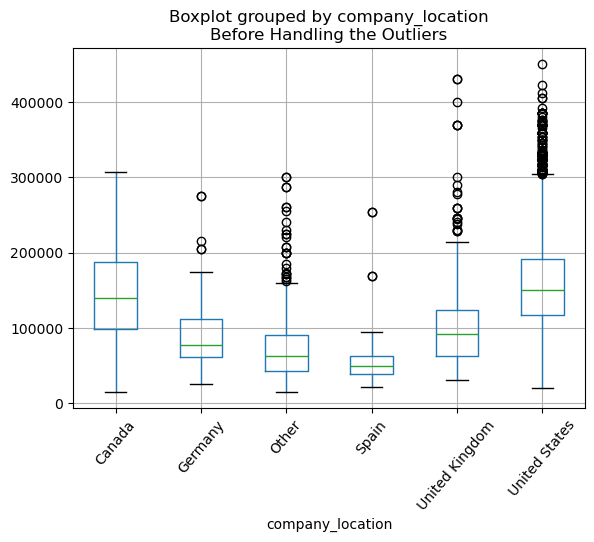

In [30]:
# Boxplot before handling the outliers
df.boxplot('salary_in_usd' , 'company_location')
plt.title('Before Handling the Outliers')
plt.xticks(rotation = 50)
plt.show()

In [32]:
# Define Outliers
def find_outliers(df, column_name, location_value):
    subset = df[df['company_location'] == location_value][column_name]
    
    Q1 = subset.quantile(0.25)
    Q3 = subset.quantile(0.75)
    IQR = Q3 - Q1
    
    outliers = df[(df['company_location'] == location_value) & ((df[column_name] < Q1 - 1.5 * IQR) | (df[column_name] > Q3 + 1.5 * IQR))]
    
    return outliers

In [34]:
# Handle outliers by removing them.
outliers_us_salary = find_outliers(df, 'salary_in_usd', 'United States')
df.drop(outliers_us_salary.index, inplace=True)
outliers_us_salary = find_outliers(df, 'salary_in_usd', 'Other')
df.drop(outliers_us_salary.index, inplace=True)
outliers_us_salary = find_outliers(df, 'salary_in_usd', 'United Kingdom')
df.drop(outliers_us_salary.index, inplace=True)

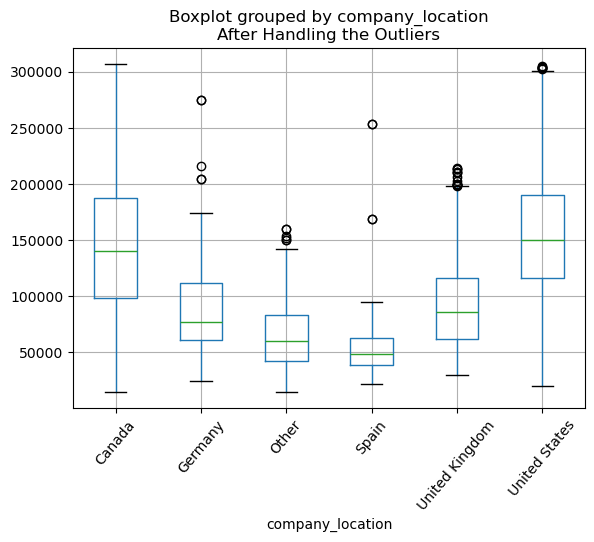

In [36]:
# Boxplot after handling the outliers
df.boxplot('salary_in_usd' , 'company_location')
plt.title('After Handling the Outliers')
plt.xticks(rotation = 50)
plt.show()

## Label Encoding: 
- Encode categorical variables into numerical values.

In [38]:
from sklearn.preprocessing import LabelEncoder
le_education = LabelEncoder()
df['job_title'] = le_education.fit_transform(df['job_title'])
df["job_title"].unique()

array([ 40,  39,  66,  99,  42,  93,  33,   7,  11,  17,  24, 116, 114,
       115,  62,  58,  56, 100,   2,  91,  75,  50,  57,  60,  21,  49,
        90,  61,  82,  14,  47,  96,  68,  15,  44,  25,  45,  65,  23,
         4,  46,  48,   1,   0,  64,  69,  26,  94,  59,  77,  20,  74,
        81,  70,  31,  73,  85,  72,  78,  37,  13,  41, 111,  63,  43,
       101,  97,   5,  84,   8,   3,  52,  36,  53,  95,  88, 112, 110,
       108,  83, 120, 119, 102,  22,  54,  89, 104,  51,  80, 117,  98,
        30,  55,  28, 107,   6,  71, 113,  12,   9, 118,  79,  19,  86,
        16,  10,  29,  76,  38,  18,  32, 106, 103,  92,  67, 105,  35,
        34,  27,  87, 109])

In [40]:
le_education = LabelEncoder()
df['job_category'] = le_education.fit_transform(df['job_category'])
df["job_category"].unique()

array([4, 3, 7, 9, 2, 8, 0, 6, 5, 1])

In [42]:
le_education = LabelEncoder()
df['employee_residence'] = le_education.fit_transform(df['employee_residence'])
df["employee_residence"].unique()

array([25, 74, 73, 10, 64, 33, 62, 53, 47, 71, 40, 54,  3, 23, 70, 13, 34,
       61, 56, 27, 30, 39, 44,  2, 15, 67, 63, 21, 69, 52,  8, 57, 37, 68,
       26,  5, 66,  0, 19, 51, 45, 46, 49, 58,  1, 20, 75, 24, 11, 22,  4,
       60, 65, 38, 16,  7, 50, 14, 12, 55,  6, 31, 72, 42, 35, 28, 17, 76,
       32,  9, 36, 59, 48, 29, 18, 41, 43])

In [44]:
le_education = LabelEncoder()
df['experience_level'] = le_education.fit_transform(df['experience_level'])
df["experience_level"].unique()

array([2, 3, 1, 0])

In [46]:
le_education = LabelEncoder()
df['employment_type'] = le_education.fit_transform(df['employment_type'])
df["employment_type"].unique()

array([0])

In [48]:
le_education = LabelEncoder()
df['company_location'] = le_education.fit_transform(df['company_location'])
df["company_location"].unique()

array([1, 5, 4, 0, 3, 2])

In [50]:
le_education = LabelEncoder()
df['company_size'] = le_education.fit_transform(df['company_size'])
df["company_size"].unique()

array([0, 1, 2])

## Model Training:
- Prepare features (X) and target (Y).
- Train a Linear Regression model and a Decision Tree Regressor model.
- Evaluate the models using Root Mean Squared Error (RMSE).

In [52]:
# Prepare features and target
X = df.drop(['salary_in_usd' , 'job_title'] , axis = 1)
Y = df['salary_in_usd']

In [54]:
# Train a Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X,Y.values)

LinearRegression()

In [56]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
# Evaluate Linear Regression model
y_pred = linear_model.predict(X)
error = np.sqrt(mean_squared_error(Y, y_pred))
print("${:,.02f}".format(error))

$50,844.82


In [58]:
from sklearn.tree import DecisionTreeRegressor
# Train a Decision Tree Regressor model
dec_tree_reg = DecisionTreeRegressor(random_state=0)
dec_tree_reg.fit(X, Y.values)

DecisionTreeRegressor(random_state=0)

In [60]:
# Evaluate Decision Tree Regressor model
y_pred = dec_tree_reg.predict(X)
y_pred = dec_tree_reg.predict(X)
error = np.sqrt(mean_squared_error(Y, y_pred))
print("${:,.02f}".format(error))

$44,686.53


## Single Prediction Example:

- Example to transform new data and predict the salary using the Decision Tree Regressor model.
- Save and load the trained model with pickle for future use.

In [66]:
# Example
X = np.array(['Data Engineering', 'Germany', 'Mid-level', 'Full-time', 'United States', 'M'])

In [68]:
# Example prediction
le_education = LabelEncoder()
all_unique_values = np.unique(X)  
le_education.fit(all_unique_values)

X = le_education.transform(X)
X = X.astype(float)
X

array([0., 2., 4., 1., 5., 3.])

In [70]:
# Predict with Decision Tree Regressor
y_pred = dec_tree_reg.predict(X.reshape(1, -1))
y_pred

array([80000.])

In [72]:
# Save the trained model and label encoder
import pickle
data = {'model' : dec_tree_reg, 'le_education' : le_education}
with open('saved_steps.pkl' , 'wb') as file:
    pickle.dump(data, file)

In [74]:
# Load the trained model and label encoder
with open('saved_steps.pkl', 'rb') as file:
    data = pickle.load(file)

regressor_loaded = data["model"]
le_education = data["le_education"]

In [76]:
y_pred = regressor_loaded.predict(X.reshape(1, -1))
y_pred

array([80000.])